In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import os

from astropy.io import fits
from astropy.table import Table
from astropy.wcs import WCS

from scipy.stats import binned_statistic

from photometry_tools import phot_wrapper

%load_ext autoreload
%autoreload 2
from psf_tools import run_hst1pass, align_images, make_final_table

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       imagefindpars           mapreg              photeq       
     pixreplace           pixtopix            pixtosky        refimagefindpars  
     resetbits          runastrodriz          skytopix           tweakback      
      tweakreg           updatenpol


In [2]:
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 10
plt.rcParams.update({'axes.titlesize' : '18',
                     'axes.labelsize' : '14',
                     'xtick.labelsize' : '14',
                     'ytick.labelsize' : '14'})
%matplotlib inline

### Get the list of images

In [3]:
cd n44

/Users/vbajaj/Documents/wfc3_photometry/wfc3_photometry/n44


In [4]:
input_images =[im for im in  sorted(glob.glob('*flc.fits')) if fits.getval(im, 'FILTER')=='F814W']
# input_images = sorted(glob.glob('*flc.fits'))

In [5]:
for im in input_images:
    print(im, fits.getval(im, 'exptime'))

('id7307xfq_flc.fits', 697.0)
('id7307xhq_flc.fits', 697.0)
('id7307xlq_flc.fits', 697.0)
('id7307xpq_flc.fits', 441.0)
('id7319mbq_flc.fits', 697.0)
('id7319meq_flc.fits', 697.0)
('id7319miq_flc.fits', 611.0)


### See input options:

In [6]:
run_hst1pass?

In [7]:
# run_hst1pass(input_images=input_images, hmin=4, fmin=10000., pmax=72000., executable_path='../psf_tools/hst1pass.e')
catalogs = run_hst1pass(input_images=input_images, hmin=5, fmin=500., pmax=90000,  executable_path='../psf_tools/hst1pass.e', focus=-1)

Using PSF file ../psf_tools/STDPBF_WFC3UV_F814W.fits
../psf_tools/hst1pass.e HMIN=5 FMIN=500.0 PMAX=90000 OUT=xympqk FOCUS=-1 PSF=../psf_tools/STDPBF_WFC3UV_F814W.fits id7307xfq_flc.fits id7307xhq_flc.fits id7307xlq_flc.fits id7307xpq_flc.fits id7319mbq_flc.fits id7319meq_flc.fits id7319miq_flc.fits


ARG0000  ../psf_tools/hst1pass.e
ARG0001  HMIN=5
ARG0002  FMIN=500.0
ARG0003  PMAX=90000
ARG0004  OUT=xympqk
--->    NLISTs =            1
--->    NITEMs =            6
--->   OUTLIST = xympqk
ARG0005  FOCUS=-1
---> FOCUS_LEVELi:   -1.00000000
ARG0006  PSF=../psf_tools/STDPBF_WFC3UV_F814W.fits
ARG0007  id7307xfq_flc.fits
---> NIM0001 id7307xfq_flc.fits
ARG0008  id7307xhq_flc.fits
---> NIM0002 id7307xhq_flc.fits
ARG0009  id7307xlq_flc.fits
---> NIM0003 id7307xlq_flc.fits
ARG0010  id7307xpq_flc.fits
---> NIM0004 id7307xpq_flc.fits
ARG0011  id7319mbq_flc.fits
---> NIM0005 id7319mbq_flc.fits
ARG0012  id7319meq_flc.fits
---> NIM0006 id7319meq_flc.fits
ARG0013  id7319miq_flc.fits
---> NIM0007 i

30 1460.504   19.153  -8.970   35.1|5 5 8|    834|   661    63   553    77|   339    50    67    49|      35    2389    2234
40 2149.699   20.531  -9.116   35.3|5 6 9|    986|    54   222   395   294|   970    70    70   441|      35    2406    2258
50 2785.848   23.324  -8.974   38.6|5 6 9|    621|   227   378   169   594|    85   126   209   319|      38    1914    1741
60 2856.648   26.553  -8.310   41.8|5 5 8|    578|    89   522    67   134|    43    48    73   131|      41    1367    1194
70  875.431   30.393  -9.286   35.3|5 6 9|    744|   649   220   221   554|   183    91   547   169|      35    2495    2337
80 3654.742   35.538  -9.497   23.3|5 811|    995|   311   727   319   627|   118   233   249   401|      23    2752    2633
90  294.212   39.076 -10.846   28.5|5 912|   3295|  2161  1104  2542   990|  1587   937   646   406|      28    9587    9424
100 3071.105   40.973  -8.958   40.1|5 6 9|    610|   403   307   428   223|   267   193   143   143|      40    1710    1548

5000 1883.607 1339.797  -7.706   30.9|5 4 7|    222|    67   216   112   108|    67    92    54    65|      30     643     513
5100 1188.565 1365.064  -8.312   40.9|5 5 8|    450|    46   166    39   313|    53    34    55   401|      40    1331    1153
5200  120.859 1388.606 -12.813   47.8|51114|  20660| 19752 14640   403  1188|   146   593   259  5818|      47   42308   42107
5300 1291.982 1411.072  -8.662   29.3|5 5 8|    463|   239   260   367   165|   181   199    78    66|      29    1290    1171
5400 2423.033 1432.564 -10.617   56.4|5 912|   2885|  1352  1304  1026  1815|   508   573  1008   756|      56    7062    6804
5500 2315.989 1456.419  -8.954   28.8|5 4 7|    866|    56    73   661   581|    39    36   108    85|      28    1637    1524
5600 1048.681 1478.161  -9.581   68.5|5 5 8|    932|   372   740   803   320|   309   721   174   220|      68    3197    2927
5700 3106.907 1499.636 -12.542   31.2|51114|  17293|  6727  9237  6395  9345|  2460  3641  3951  4543|      31 

11500  304.340 2808.801  -8.368   86.8|5 5 8|    391|   355   202   256   207|   210   152   204   138|      86    1213     863
11600  690.811 2830.511  -7.773  128.4|5 4 7|    343|   184   240   184   251|   156   196   185   214|     128    1049     542
11700  987.498 2850.437  -9.499   77.8|5 5 8|    914|   887   294   315   673|   306   145   707   201|      77    3183    2842
11800  566.730 2870.034 -10.453  147.3|5 6 9|   2227|   836  1628  1705   872|   735  1325   413   739|     147    6887    6292
11900 3007.801 2889.048  -9.342   23.0|5 6 9|    960|    24    66    31   597|    25    34    58   378|      22    2002    1907
12000 3431.286 2911.569  -9.813  105.9|5 4 7|   1129|   215   507   600   263|   238   766   196   284|     105    3003    2599
12100 3767.520 2932.078  -9.638   45.9|5 6 9|    969|   948   101   118   908|   143    58   964    96|      45    3790    3615
12200  972.643 2951.477 -11.492  106.4|5 912|   5658|  1551  4749  1798  4268|   681  1605  1326  3223| 


DOMSORT...
---->   1:    0.0000000000000000
---->  Ns:    0.0000000000000000

SEPARATE READ-IN:
CRVAL1:    80.514258546427001       05:22:03.42
CRVAL2:   -67.931615208037002      -67:55:53.82

OUTPUT LISTS...
NLISTs:            1
SETUPa---           26
SETUPb ---        17271

--------------
FIND SPACING:
--------------
F01 (05:14)     u -- u ref-frame
F02 (05:14)     v -- v ref-frame
F03 (02:08)     M -- instl mag (1000s)
F04 (01:08)     x -- raw detector x pos
F05 (01:08)     y -- raw detector y pos
F06 (02:08)     m -- instl mag
F07 (02:02)     k -- detector chip no
F08 (01:08)     X -- dist-cor x posn
F09 (01:08)     Y -- dist-cor y posn
F10 (02:02)     h -- local isolation
F11 (04:08)     H -- list-based isolatn
F12 (06:15)     r -- RA (deg)
F13 (05:15)     d -- Dec (deg)
F14 (01:11)     R -- RA (sexig)
F15 (01:12)     D -- Dec (sexig)
F16 (03:06)     i -- peak pixel column
F17 (03:06)     j -- peak pixel row
F18 (02:12)     p -- peak pixel value
F19 (08:12)     q -- quality of f

10 3744.961    8.504  -9.821   15.6|5 912|   1343|   596   680   416   911|   176   250   428   392|      15    3328    3246
20 1152.865   10.888  -9.836   22.6|5 6 9|   1395|   175   301  1114   974|   132   273   199   139|      22    3085    2989
30 1665.162   12.889  -7.937   23.4|5 5 8|    259|   163   100   156   109|    98    71    74    66|      23     678     583
40 2472.075   15.656  -7.976   33.6|5 5 8|    280|   174   129   140   170|    87    83   107   105|      33     732     587
50  853.119   20.576  -9.764   26.4|5 710|   1516|    59  1140   349   108|  1274   103    35   539|      26    3305    3201
60 1838.257   24.280  -7.779   26.6|5 5 8|    205|   144    60   193    61|   134    85    43    60|      26     677     570
70  105.891   28.583  -9.398   23.9|5 5 8|    923|   398   534   382   623|   146   208   254   309|      23    2391    2297
80 1112.989   31.404 -10.937   29.0|51013|   3561|  1655  1851   997  2850|   467   526  1415  1303|      29    9567    9444


4900 1092.863 1493.157  -8.049   87.9|5 4 7|    277|   194   152   240   163|   117   239   259    98|      87     909     600
5000 1198.761 1519.182  -9.212   30.0|5 6 9|    918|    87   145   784   554|    68   232    21   483|      29    2102    1970
5100 2705.502 1546.251  -8.507   22.8|5 4 7|    552|    43   247    24   184|    27    21    34   538|      22    1522    1429
5200 1650.710 1577.470 -11.935   21.6|51013|   8285|  2364  6230  2514  7488|   751  2141  1859  3874|      21   25878   25714
5300 3508.756 1603.133  -7.687   19.8|5 5 8|    214|    97   135   131    35|    52   119    27    40|      19     601     526
5400 1927.867 1633.635 -11.303   22.0|51013|   5269|  2007  3080  1976  2988|   774  1279  1213  1509|      21   12847   12717
5500 3540.040 1661.547 -10.258   19.0|5 912|   2079|   976   920   690  1251|   359   315   748   562|      19    5054    4964
5600  177.257 1687.965  -9.438   58.2|5 6 9|    883|   686   411   630   328|   491   268   295   166|      58 

11400  223.304 3111.260  -8.106   88.5|5 4 7|    313|   244   169   134   292|   143   108   257   158|      88    1107     750
11500  652.986 3131.859  -8.496  243.5|5 4 7|    648|   448   440   477   413|   318   382   339   285|     243    1948     961
11600 1830.585 3151.332  -9.779   30.0|5 6 9|   1131|   379   239   357   427|   990    88    94   688|      29    2859    2731
11700 2034.377 3171.237  -9.462   21.7|5 710|    757|   656   195   710   187|   637   313   189   104|      21    2763    2650
11800 1447.918 3193.316  -8.525   52.3|5 5 8|    400|   200   257   148   381|    76   128   201   209|      52    1248    1037
11900  534.620 3214.197  -7.850  189.6|5 3 6|    376|   230   311   330   247|   238   332   214   223|     189    1351     591
12000  273.389 3232.172  -9.132   96.4|5 5 8|    659|   579   258   590   234|   540   249   229   176|      96    2370    1977
12100  508.577 3249.791  -8.389  169.7|5 4 7|    474|   249   438   330   323|   237   326   207   312| 

enter subroutine sub_hst2xym: FILENAME = id7307xlq_flc.fits

ENTER sub_hst2xym -- id7307xlq_flc.fits
ENTER sub_hst2xym -- As:      0
ENTER sub_hst2xym --  V:      2

DOAPPHOT:  F
HHo:           11
0001 #
0002 #--------------------------------------------
0003 # ARGUMENTS
0004 #--------------------------------------------
0005 #   ARG0000: ../psf_tools/hst1pass.e
0006 #   ARG0001: HMIN=5
0007 #   ARG0002: FMIN=500.0
0008 #   ARG0003: PMAX=90000
0009 #   ARG0004: OUT=xympqk
0010 #   ARG0005: FOCUS=-1
0011 #   ARG0006: PSF=../psf_tools/STDPBF_WFC3UV_F814W.fits
HMIN:            5
FMIN:    500.000000
PMAX:    90000.0000
PSFFILE_INP: ../psf_tools/STDPBF_WFC3UV_F814W.fits
GDCFILE_INP: AUTO
HIFLAG:        70000
WCSMODE: FIND
DOSATD:  T
SHOW_ALL: NO
SHOW_USE: NO
SHOW_FND: NO
SHOW_REF: NO
SHOW_SUB: NO
SHOW_MSK: X
NPERTs:            0
FOCUS_LEVi:   -1.00000000
KSEL:            0
QMAX:    9.98999977
CMIN:   -1.00000000      0.100000001
QCAND:  F
IMIN:         -999        9999
JMIN:         -999   

30 3912.404   18.120  -8.433   23.7|5 5 8|    346|   308    82   282   110|   250    88    77    54|      23    1188    1092
40 2068.591   21.016  -9.680   30.6|5 710|   1113|   290   982   758   340|   221   678   154   290|      30    3532    3406
50 2313.278   24.903  -9.440   39.1|5 710|   1032|   708   322   598   362|   431   199   279   128|      39    2771    2604
60 1650.517   28.474  -8.749   29.0|5 5 8|    756|    65   669    57   248|    41    96    63   256|      28    1929    1812
70 1112.700   31.895  -8.645   26.4|5 6 9|    453|   167   346   289   193|    99   210    85   140|      26    1301    1198
80 3565.658   35.042  -9.927   13.9|5 5 8|   1575|   266   678   763   469|    89  1025   657   130|      13    4042    3973
90  639.724   37.662  -9.544   28.7|5 6 9|   1618|    87   504  1250   566|    55    72    66   539|      28    3445    3334
100 1872.392   41.709 -10.483   26.2|5 912|   3707|  3491   549   582   836|   533   357   800   117|      26    8837    8731

5000 1001.953 1513.711  -8.615  157.7|5 4 7|    598|   339   410   317   365|   304   253   260   262|     157    1637    1027
5100 1504.327 1541.946  -8.527   17.7|5 5 8|    418|   317   127   265   142|   191    94   120    46|      17    1192    1116
5200 3346.184 1564.700  -9.768   17.3|5 912|   1366|   856   453   574   633|   351   238   469   248|      17    3326    3250
5300 2526.513 1596.411 -11.403   21.1|5 912|   4746|  1048  4657  1167  3751|   373  1297   878  3459|      21   16615   16475
5400 3704.879 1629.711 -12.017   19.1|51013|  10891|  4247  6121  4643  5342|  1755  2572  2079  2741|      19   25096   24929
5500 3197.091 1653.747  -9.342   20.9|5 710|    893|   520   424   444   410|   224   173   259   182|      20    2083    1994
5600 3653.576 1678.773  -8.843   23.3|5 4 7|    793|   777    48   218    66|   102    68   205    66|      23    1892    1782
5700 3153.802 1702.934 -11.538   22.1|5 912|   6579|  2279  4087  4151  2392|  1359  2719   890  1327|      22 

11600  806.606 3148.523  -8.095  194.8|5 4 7|    422|   292   384   245   338|   355   265   229   335|     194    1480     695
11700  881.695 3168.428  -9.387  256.4|5 5 8|   1035|   524   874   490   878|   310   468   477   715|     256    3503    2464
11800  499.439 3191.240  -7.918  201.1|5 4 7|    387|   363   260   224   372|   224   189   358   238|     201    1481     719
11900  128.316 3210.570 -10.009   55.9|5 710|   1524|  1198   541   639  1006|   466   229   837   302|      55    4567    4337
12000  923.396 3232.289 -12.717  230.2|51013|  15485| 13238  4576  4010 14383|  3442  2064 12900  3808|     230   56007   54934
12100 3464.456 3253.859  -8.246   16.3|5 5 8|    294|   266    70   177   128|   148    59   139    45|      16     887     816
12200  871.648 3273.858  -8.897  252.5|5 4 7|    762|   458   673   529   447|   345   516   331   469|     252    2481    1466
12300  999.913 3292.922  -8.010  206.0|5 3 6|    458|   319   354   332   290|   297   320   268   244| 

enter subroutine sub_hst2xym: FILENAME = id7307xpq_flc.fits

ENTER sub_hst2xym -- id7307xpq_flc.fits
ENTER sub_hst2xym -- As:      0
ENTER sub_hst2xym --  V:      2

DOAPPHOT:  F
HHo:           11
0001 #
0002 #--------------------------------------------
0003 # ARGUMENTS
0004 #--------------------------------------------
0005 #   ARG0000: ../psf_tools/hst1pass.e
0006 #   ARG0001: HMIN=5
0007 #   ARG0002: FMIN=500.0
0008 #   ARG0003: PMAX=90000
0009 #   ARG0004: OUT=xympqk
0010 #   ARG0005: FOCUS=-1
0011 #   ARG0006: PSF=../psf_tools/STDPBF_WFC3UV_F814W.fits
HMIN:            5
FMIN:    500.000000
PMAX:    90000.0000
PSFFILE_INP: ../psf_tools/STDPBF_WFC3UV_F814W.fits
GDCFILE_INP: AUTO
HIFLAG:        70000
WCSMODE: FIND
DOSATD:  T
SHOW_ALL: NO
SHOW_USE: NO
SHOW_FND: NO
SHOW_REF: NO
SHOW_SUB: NO
SHOW_MSK: X
NPERTs:            0
FOCUS_LEVi:   -1.00000000
KSEL:            0
QMAX:    9.98999977
CMIN:   -1.00000000      0.100000001
QCAND:  F
IMIN:         -999        9999
JMIN:         -999   

90  662.910   43.715 -11.240   21.1|51013|   5235|  2144  2874  2455  2686|   933  1342  1202  1345|      21   12141   12024
100 1062.571   50.115  -8.274   16.5|5 5 8|    395|    39   395   358    35|    25   142    32    35|      16    1291    1216
150 2898.169   69.554  -9.112   20.3|5 6 9|    792|   457   288   262   451|   148   111   326   169|      20    2027    1940
200 4013.763   88.551  -8.747   11.9|5 811|    510|   163   338   177   329|    72   128   128   199|      11    1378    1328
250 2344.702  113.876 -10.769   35.5|51013|   3500|   981  2501  1950  1297|   515  1307   378   876|      35    9259    9090
300 1065.332  132.079 -11.891   58.4|51013|   8119|  6576  2394  6480  2273|  4826  2064  2033   897|      58   26003   25690
350 3687.647  152.102  -8.415    9.0|5 710|    327|   103   255   270   104|    72   225    43    93|       9    1079    1035
400 2410.146  169.947  -9.114   27.9|5 5 8|    930|    46    37   150   760|    18    22   181    49|      27    1919  

5600 3359.415 1976.790  -9.972   13.9|5 5 8|   1410|  1354   376   776   621|   614   226   660   154|      13    4156    4093
5700 2473.834 2005.842  -7.806   12.1|5 5 8|    180|   142   157   132   120|    64    83    25    64|      12     553     501
5800 3000.770 2034.460 -10.285    9.2|51619|   2088|   628  1356   604  1503|   206   400   520   956|       9    5904    5843
5900 1917.664 2077.802  -9.782   37.2|5 5 8|   1930|    89   636  1128   610|    49   245    30   402|      37    3940    3796
6000 2947.660 2102.933  -7.620   10.7|5 5 8|    152|    87   151   131    88|    14   119    39    41|      10     555     512
6100 2795.493 2129.606  -8.326    8.7|5 5 8|    320|    81   275   127   187|    16   122    45   170|       8     954     914
6200  382.909 2163.259  -9.821   33.1|5 5 8|   1205|   511   645  1193   301|   500   646   164   198|      33    3690    3555
6300 2621.624 2196.981  -7.612   12.2|5 5 8|    182|    71   141   122    63|    23   100    10    46|      12 

12100 1196.475 4083.638 -11.693   30.7|51114|   6469|  6376  1715  2770  3676|  2701   881  3852   964|      30   20375   20213
------- -------- -------- ------- ------|- - -|-------| ----- ----- ----- -----| ----- ----- ----- -----| ------- ------- -------
N    XCEN     YCEN     MAG     SKY |MiSoS|   PCEN|   P02   P03   P04   P05|   P06   P07   P08   P09|    mSKY    F2x2 F2x2-SK
------- -------- -------- ------- ------|- - -|-------| ----- ----- ----- -----| ----- ----- ----- -----| ------- ------- -------

#   1    12261    0.073%   ..1..not on chip....
#   2 15021967   89.538%   ..2..not loc max....
#   3  1471791    8.773%   ..3..nearby brighter
#   4   161072    0.960%   ..4..flux too low...
#   5        0    0.000%   ..5..below mask thr.
#   6        0    0.000%   ..6..out of bounds..
#   7      100    0.001%   ..7..loflag issues..
#   8        0    0.000%   ..8..saturated......
#   9       67    0.000%   ..9..not contig sat.
#  10        0    0.000%   .10..not loc sat max
#  11 

#  HISTMODE...  pixc (W/ SKYSUB):    20.77
DOAPPHOT:  F

CALL findfocus_stdpbf...  FOCUS_LEVELi =   -1.00000000

ENTER loadstdpsf_stdpbf...
CALL loadfits_stdpbf...
DETERMINE floc =    7.40000010
USE floc =    7.40000010
call loadstdpsf_stdpbf:
--->  FOCUS_LEVi:   -1.00000000
--->  FOCUS_LEVu:    7.40000010
---> PSFFILE_USE: id7319mbq_pff.fits
---> PSFFILE_PFF: id7319mbq_pff.fits
--->       NFOCu:          411
--->  FOCUS_LEVi:   -1.00000000
--->  FOCUS_LEVu:    7.40000010
---> PSFFILE_LIB: ../psf_tools/STDPBF_WFC3UV_F814W.fits
---> PSFFILE_USE: id7319mbq_pff.fits
---> PSFFILE_PFF: id7319mbq_pff.fits

HERE IS THE INFO ON THE PSF TO BE USED...

PSFFILE_LIB: ../psf_tools/STDPBF_WFC3UV_F814W.fits
ENTER loadstdpsf_stdpbf...
CALL loadfits_stdpbf...
DETERMINE floc =    0.00000000
USE floc =    5.50000000


*************************************
*************************************
**
**  GO THRU IMAGE AND FIND PEAKS...
**
**     HMIN:            5
**     FMIN:    500.000000
**     PMAX:    90

2500 1432.515  827.861 -11.667   72.6|5 811|   6384|  1553  6187  3516  2579|   990  3480   808  2406|      72   19568   19160
2600 3811.463  857.672  -9.296   17.4|5 6 9|    984|   616    29   239   750|   214    36   230    13|      17    2582    2509
2700  599.155  889.555  -8.356   32.2|5 5 8|    357|   257   175   149   255|   104    86   158   106|      32    1029     894
2800 2846.437  917.291  -8.086   16.7|5 5 8|    316|   300    42    15   260|    20    14   249    21|      16    1126    1056
2900 3538.212  948.613  -8.884   15.9|5 710|    799|   441   698    35    75|    40     8   144    26|      15    1600    1534
3000 3947.391  976.645  -8.970   14.1|5 710|    577|   467   176   248   328|   204    73   276    81|      14    1650    1587
3100  275.849 1008.974  -8.849   35.0|5 5 8|    566|   249   387   423   218|   171   218    89   132|      35    1596    1446
3200 3991.496 1042.686 -12.446   21.3|51114|  13438|  2766 13388  5272  6985|  1258  5486  1642  6330|      21 

9000 1614.132 2591.867 -10.263   46.2|5 811|   2120|  1224   855  1144   833|   729   570   557   333|      46    5218    5016
9100  594.962 2619.236  -9.630   54.3|5 6 9|   1040|   476   514   930   300|   581   579   143   169|      54    3065    2825
9200 2073.595 2643.624 -10.378   31.0|5 912|   2042|   588  1801   797  1203|   268   740   358  1040|      30    6088    5959
9300 1181.375 2671.221  -8.831   59.4|5 5 8|    485|   428   183   472   144|   382   170   164   133|      59    1769    1507
9400 1473.526 2692.016  -7.948   46.5|5 4 7|    343|   299    81   164    69|   180    40    81    42|      46     987     795
9500 3169.895 2717.254  -8.768   18.0|5 6 9|    445|   240   262   107   388|    72    56   206   282|      17    1378    1303
9600  866.064 2741.871 -10.793   67.9|5 5 8|   4050|   100    72  2433  3528|   110    58    80    72|      67    7759    7453
9700 2792.816 2764.296  -9.220   18.3|5 811|    743|   258   454   147   645|   138   104   214   373|      18 


DOMSORT...
---->   1:    0.0000000000000000
---->  Ns:    0.0000000000000000

SEPARATE READ-IN:
CRVAL1:    80.513895459419999       05:22:03.33
CRVAL2:   -67.931959269497000      -67:55:55.05

OUTPUT LISTS...
NLISTs:            1
SETUPa---           26
SETUPb ---        14752

--------------
FIND SPACING:
--------------
F01 (05:14)     u -- u ref-frame
F02 (05:14)     v -- v ref-frame
F03 (02:08)     M -- instl mag (1000s)
F04 (01:08)     x -- raw detector x pos
F05 (01:08)     y -- raw detector y pos
F06 (02:08)     m -- instl mag
F07 (02:02)     k -- detector chip no
F08 (01:08)     X -- dist-cor x posn
F09 (01:08)     Y -- dist-cor y posn
F10 (02:02)     h -- local isolation
F11 (04:08)     H -- list-based isolatn
F12 (06:15)     r -- RA (deg)
F13 (05:15)     d -- Dec (deg)
F14 (01:11)     R -- RA (sexig)
F15 (01:12)     D -- Dec (sexig)
F16 (03:06)     i -- peak pixel column
F17 (03:06)     j -- peak pixel row
F18 (02:12)     p -- peak pixel value
F19 (08:12)     q -- quality of f

7 1614.686    8.733  -8.881   38.0|5 5 8|    929|    78   453   224   652|    49   177    56    95|      37    2131    1976
8 1823.654    8.396  -8.538   37.1|5 5 8|    660|    60   322    66   567|    48    64    56   176|      37    1727    1583
9 2960.778    8.826  -9.043   40.9|5 5 8|    781|   271   514   414   346|   139   267   133   205|      40    1978    1829
10  558.798    9.649  -8.469   36.7|5 5 8|    424|   176   314   184   256|   102   147   118   164|      36    1158    1011
20  572.190   13.523  -9.225   35.4|5 6 9|   1004|   265   103   465   622|   142    48   150   234|      35    2042    1888
30 2150.932   17.681 -11.142   41.0|51013|   5204|  2141  2566  1980  2697|   857  1113  1064  1225|      40   11694   11495
40 3931.351   20.439  -9.320   28.4|5 6 9|   1213|   590   608   104   370|    99    80   434    79|      28    2609    2486
50 2088.061   22.945  -9.639   39.0|5 6 9|   1265|   673   573   765   452|   425   362   253   192|      38    3129    2969
60 

4500   28.673 1253.812  -8.680   56.7|5 5 8|    488|   215   415   284   230|   130   238   147   209|      56    1426    1202
4600  748.795 1279.780  -8.021   58.5|5 5 8|    268|   171   224   182   167|   104   117   113   111|      58     793     556
4700 3891.306 1307.992  -9.944   22.1|5 811|   1549|  1079   436  1023   445|   693   290   375   158|      22    4346    4226
4800 1731.953 1330.026  -9.306   26.1|5 5 8|    837|    37    24   425   653|   706    20    51   196|      26    2006    1900
4900 2664.152 1355.501  -9.144   34.4|5 5 8|    748|   437   323   271   531|   156   141   372   183|      34    2090    1943
5000 2799.632 1378.242  -7.927   27.6|5 5 8|    207|   100   157   163   105|    72   179    54    54|      27     708     596
5100 2649.247 1402.309 -13.539  103.3|5 5 8|  35604| 23779 11959  8815 30199|  5799  3768 21487  9472|     103  111071  110363
5200 1157.837 1427.267  -7.816   50.6|5 5 8|    252|   103   148   233    86|   126   185    61    56|      50 

11000 2375.371 2785.594  -9.659   29.1|5 811|   1486|   836   957   186   157|   744   129    57   502|      29    3253    3141
11100  737.442 2806.339  -7.908  128.7|5 3 6|    311|   255   177   281   162|   290   183   153   142|     128    1139     564
11200 1601.111 2824.475 -13.149   60.2|51114|  27857| 15883 12077  9450 20449|  4763  4115 11975  7775|      60   76166   75741
11300 2400.731 2842.777  -9.506   32.6|5 5 8|   1023|   353   720   570   515|   181   416   176   346|      32    2730    2596
11400  144.554 2864.585 -10.546   93.1|5 710|   2357|   669  2302   987  1517|   307   902   522  1361|      93    7539    7150
11500 1905.164 2884.538  -9.308   38.0|5 5 8|   1263|    62    37   655   266|    35   101   776    27|      38    2368    2207
11600  825.234 2907.545 -12.298  213.3|5 912|  12792|  8828  4650  4673  8379|  3203  2073  5964  2823|     213   35963   34336
11700 3479.210 2926.500 -11.082   33.7|51013|   4077|  2766  1480  1419  2873|   807   847  2066   900| 


DOMSORT...
---->   1:    0.0000000000000000
---->  Ns:    0.0000000000000000

SEPARATE READ-IN:
CRVAL1:    80.514453297931993       05:22:03.46
CRVAL2:   -67.932306530370994      -67:55:56.29

OUTPUT LISTS...
NLISTs:            1
SETUPa---           26
SETUPb ---        16427

--------------
FIND SPACING:
--------------
F01 (05:14)     u -- u ref-frame
F02 (05:14)     v -- v ref-frame
F03 (02:08)     M -- instl mag (1000s)
F04 (01:08)     x -- raw detector x pos
F05 (01:08)     y -- raw detector y pos
F06 (02:08)     m -- instl mag
F07 (02:02)     k -- detector chip no
F08 (01:08)     X -- dist-cor x posn
F09 (01:08)     Y -- dist-cor y posn
F10 (02:02)     h -- local isolation
F11 (04:08)     H -- list-based isolatn
F12 (06:15)     r -- RA (deg)
F13 (05:15)     d -- Dec (deg)
F14 (01:11)     R -- RA (sexig)
F15 (01:12)     D -- Dec (sexig)
F16 (03:06)     i -- peak pixel column
F17 (03:06)     j -- peak pixel row
F18 (02:12)     p -- peak pixel value
F19 (08:12)     q -- quality of f

8 3323.726    6.283  -9.033   28.5|5 6 9|    729|   332    30    19   314|    31    40   674    37|      28    2050    1927
9 3928.470    6.401  -8.288   32.2|5 5 8|    311|   288    74   115   249|    88    63   237    73|      32    1086     958
10 3037.626    7.443  -8.684   37.1|5 5 8|    465|   131   398   159   393|    64   158   130   309|      37    1567    1415
20 3471.386   10.695  -8.956   26.4|5 6 9|    640|   571   166   266   307|   209    97   273    94|      26    1792    1676
30 3884.091   12.693  -9.686   24.6|5 912|   1272|   737   538   576   676|   267   240   382   271|      24    3069    2966
40 3529.959   16.351 -10.163   24.4|5 6 9|   2321|   355   100  1808  2145|   146  1262    42    31|      24    5491    5390
50  975.747   19.508  -8.597   35.0|5 5 8|    483|   150   330   160   303|    76   130   153   218|      34    1336    1193
60 3577.641   22.325  -7.907   25.4|5 5 8|    194|    84   186    73   192|    51    78    77   160|      25     734     624
70

4600 2143.142 1304.950  -7.752   38.8|5 5 8|    236|   142   124   180   111|   118    74    92    60|      38     678     525
4700 2174.048 1329.206  -8.317   30.3|5 5 8|    424|   157    55    47   397|    31    26   103   402|      30    1280    1149
4800 1240.465 1354.317  -8.167   38.6|5 5 8|    371|    38   316    31   355|    73    67    37   193|      38    1236    1080
4900  951.595 1379.535  -8.747   54.0|5 5 8|    476|   181   474   197   401|   106   189   111   268|      54    1621    1393
5000 1009.548 1402.366  -7.904   55.5|5 5 8|    250|   217    94    94   172|   104    76   226   113|      55     866     639
5100 1450.208 1425.587  -9.746   28.3|5 710|   1278|   822   486   533   735|   308   199   601   332|      28    3437    3299
5200 2681.265 1452.506  -8.828   33.2|5 5 8|    865|   408    65    85   857|    63    34    84    40|      33    2216    2076
5300 2951.848 1480.007  -8.435   27.8|5 5 8|    422|   160   265   296   152|   102   188    75    60|      27 

11100 1647.855 2847.314  -8.962   42.2|5 5 8|    787|   173   164   762    71|   151   731    55    53|      42    2446    2278
11200 3921.317 2868.235  -8.996   42.4|5 5 8|    869|   256    77   148   745|    92   124   333   104|      42    2205    2016
11300  874.614 2892.244 -10.088  148.3|5 5 8|   1750|  1390   322   349  1220|   373   291  1484   276|     148    5846    5239
11400 3444.486 2912.230  -8.479   44.2|5 4 7|    297|   160   174   174   190|    68   294   272    90|      44     941     766
11500  147.397 2932.503  -8.414   85.1|5 5 8|    439|   337   168   185   296|   180   134   273   131|      85    1347    1005
11600 2227.337 2954.212  -9.436   31.0|5 6 9|    828|   694   233   765   223|   627   269   156   135|      31    2915    2784
11700 2460.327 2971.953  -8.462   26.9|5 5 8|    420|   317   144   270   147|   201    88   111    61|      26    1208    1103
11800  678.954 2995.977  -7.859  202.0|5 4 7|    387|   299   323   349   277|   271   288   285   243| 


DOMSORT...
---->   1:    0.0000000000000000
---->  Ns:    0.0000000000000000

SEPARATE READ-IN:
CRVAL1:    80.514679889380005       05:22:03.52
CRVAL2:   -67.932442360623995      -67:55:56.79

OUTPUT LISTS...
NLISTs:            1
SETUPa---           26
SETUPb ---        16145

--------------
FIND SPACING:
--------------
F01 (05:14)     u -- u ref-frame
F02 (05:14)     v -- v ref-frame
F03 (02:08)     M -- instl mag (1000s)
F04 (01:08)     x -- raw detector x pos
F05 (01:08)     y -- raw detector y pos
F06 (02:08)     m -- instl mag
F07 (02:02)     k -- detector chip no
F08 (01:08)     X -- dist-cor x posn
F09 (01:08)     Y -- dist-cor y posn
F10 (02:02)     h -- local isolation
F11 (04:08)     H -- list-based isolatn
F12 (06:15)     r -- RA (deg)
F13 (05:15)     d -- Dec (deg)
F14 (01:11)     R -- RA (sexig)
F15 (01:12)     D -- Dec (sexig)
F16 (03:06)     i -- peak pixel column
F17 (03:06)     j -- peak pixel row
F18 (02:12)     p -- peak pixel value
F19 (08:12)     q -- quality of f

### See the output catalogs

In [21]:
glob.glob('*xympqk')

['id7307xhq_flc.xympqk',
 'id7307xwq_flc.xympqk',
 'id7307y0q_flc.xympqk',
 'id7319mbq_flc.xympqk',
 'id7307xtq_flc.xympqk',
 'id7319lbq_flc.xympqk',
 'id7319miq_flc.xympqk',
 'id7307xlq_flc.xympqk',
 'id7319meq_flc.xympqk',
 'id7307y4q_flc.xympqk',
 'id7319ljq_flc.xympqk',
 'id7307xpq_flc.xympqk',
 'id7307xfq_flc.xympqk',
 'id7319lfq_flc.xympqk']

### See options for aligning the images using the catalogs from previous step

In [9]:
# align_images?

In [10]:
align_images(catalogs, searchrad=1.0, gaia=True)

id7307xfq_flc.xympqk
id7307xhq_flc.xympqk
id7307xlq_flc.xympqk
id7307xpq_flc.xympqk
id7319mbq_flc.xympqk
id7319meq_flc.xympqk
id7319miq_flc.xympqk
Calculating coordinate ranges for Gaia query:


KeyboardInterrupt: 

In [11]:
cat shifts.txt

# frame: output
# refimage: shifts_wcs.fits[wcs]
# form: delta
# units: pixels
id7307xfq_flc.fits    -19.249969  -10.835892    0.016321     1.000107   0.109483  0.119887
id7307xhq_flc.fits    -19.351304  -10.833597    0.016240     1.000111   0.114551  0.126210
id7307xlq_flc.fits    -19.398985  -10.900116    0.016145     1.000105   0.109749  0.121450
id7307xpq_flc.fits    -19.380838  -10.922505    0.015996     1.000108   0.097437  0.105417
id7319mbq_flc.fits    0.021489  -7.783950    0.011180     1.000107   0.117832  0.133550
id7319meq_flc.fits    0.056599  -7.837551    0.011183     1.000107   0.125747  0.118891
id7319miq_flc.fits    0.103750  -7.927485    0.011526     1.000108   0.111237  0.117410


### See options for final collation of the table

In [12]:
# make_final_table?

In [6]:
i_ims, v_ims = [], []
for im in input_images:
    filt = fits.getval(im, 'filter')
    if filt == 'F814W':
        i_ims.append(im)
    elif filt == 'F555W':
        v_ims.append(im)

In [7]:
tbl_i = make_final_table(i_ims, min_detections=.65)

The output WCS is the following: 
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 80.524802370935475  -67.942847941324771  
CRPIX : 2077.5  2232.0  
CD1_1 CD1_2  : 1.0380442111314137e-05  3.6563198246427849e-06  
CD2_1 CD2_2  : 3.6563198246427849e-06  -1.0380442111314137e-05  
NAXIS : 4155  4464
Computing image coverage map.

Matching stars from input images with peaks in peakmap
N matched: 3784
N matched: 4251
N matched: 4046
N matched: 4484
N matched: 4116
N matched: 4578
N matched: 3590
N matched: 3909
N matched: 4079
N matched: 4520
N matched: 3927
N matched: 4345
N matched: 3808
N matched: 4249

Final step: collating properties of matched stars
(14, 9584)
Clipping the fit quality
Rejected 0 measurements
Performing zeropoint normalization


In [8]:
tbl_i

<Table length=9584>
     mbar          rbar          dbar      ...   n   n_expected
   float64       float64       float64     ... int64   int64   
------------- ------------- -------------- ... ----- ----------
19.0337545467 80.4477927777 -67.9292042903 ...     1          1
20.3187545467 80.4504722556 -67.9319664961 ...     1          1
18.9007545467  80.454803666  -67.936539512 ...     1          1
16.7937545467 80.4567462201 -67.9385206075 ...     1          1
 19.741761918  80.448451629 -67.9295511394 ...     3          3
 17.965761918  80.450815997  -67.932081307 ...     3          3
20.0167545467 80.4582525254 -67.9400207769 ...     1          1
18.6367545467 80.4607292565 -67.9426480474 ...     1          1
17.1487545467  80.460248548 -67.9420952625 ...     1          1
19.5357545467 80.4638108577 -67.9458675247 ...     1          1
          ...           ...            ... ...   ...        ...
17.2939441751 80.5954535302 -67.9499091933 ...     2          3
18.8757329556 80.5775626627 -67.9308541527 ...     3          4
19.2824441751 80.5928901482 -67.9471502899 ...     2          3
19.7137329556 80.5796536356 -67.9330473577 ...     3          4
18.4299441751 80.5881392839 -67.9420445588 ...     2          3
14.9046584608 80.5791434842 -67.9323884615 ...     2          3
19.6171584608 80.5727422857 -67.9255386444 ...     2          3
19.9516584608 80.5680408507 -67.9205089053 ...     2          3
19.5776584608 80.5745396844 -67.9274250177 ...     2          2
18.2096584608 80.5651528153 -67.9173608114 ...     2          2

Text(0,0.5,'$\\overline{Q}$ ')

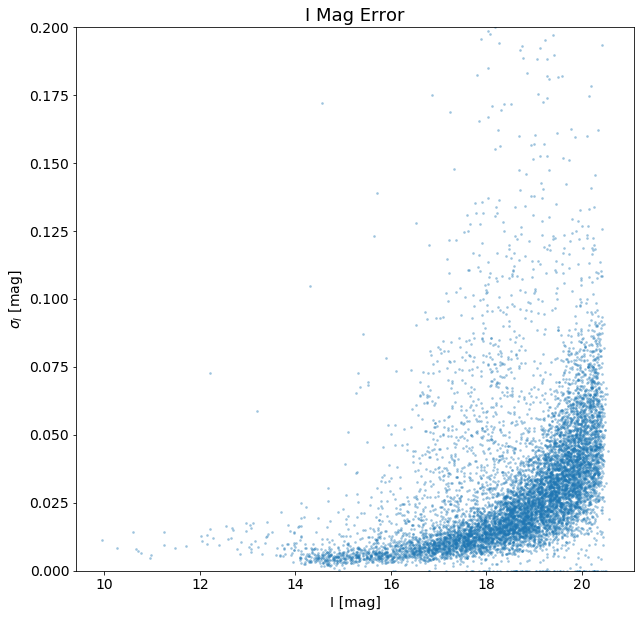

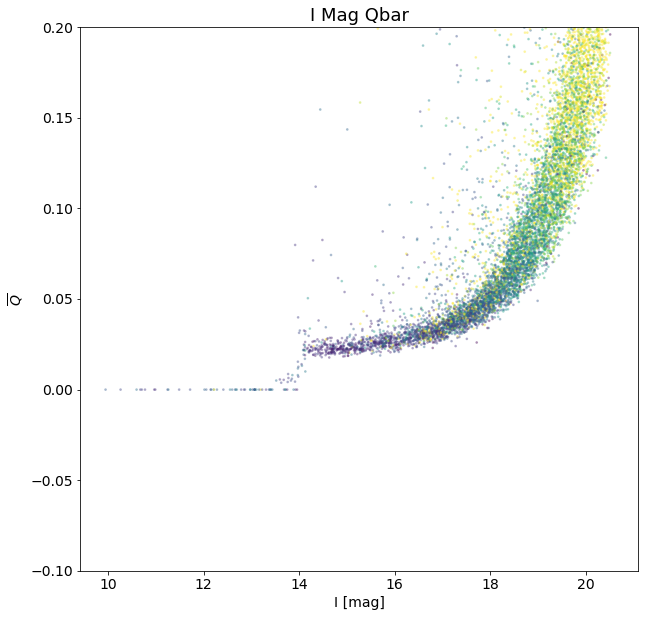

In [9]:
fig = plt.figure(figsize=(10,10))
plt.scatter(tbl_i['mbar'], tbl_i['mstd'], s=3, alpha=.3)
plt.ylim(0,.2)
plt.title('I Mag Error')
plt.xlabel('I [mag]')
plt.ylabel('$\sigma_I$ [mag]')

fig = plt.figure(figsize=(10,10))
plt.scatter(tbl_i['mbar'], tbl_i['qbar'], s=3, alpha=.3, c=tbl_i['mstd'], vmax=.04, cmap='viridis')
plt.ylim(-.1,.2)
plt.title('I Mag Qbar')
plt.xlabel('I [mag]')
plt.ylabel('$\overline{Q}$ ')

In [150]:
tbl_i.write('i_standard.txt', format='ascii.commented_header')

In [151]:
fd_tbl = tbl_i
standard_tbl = Table.read('i_focus.txt', format='ascii.commented_header')
# standard_tbl = tbl_i

In [152]:
from astropy.coordinates import SkyCoord, match_coordinates_sky

In [153]:
fd_coords = SkyCoord(fd_tbl['rbar'], fd_tbl['dbar'], unit='deg')
standard_coords = SkyCoord(standard_tbl['rbar'], standard_tbl['dbar'], unit='deg')
idx, ang, wat = fd_coords.match_to_catalog_sky(standard_coords)

In [154]:
dist_mask = ang.arcsec  < .05

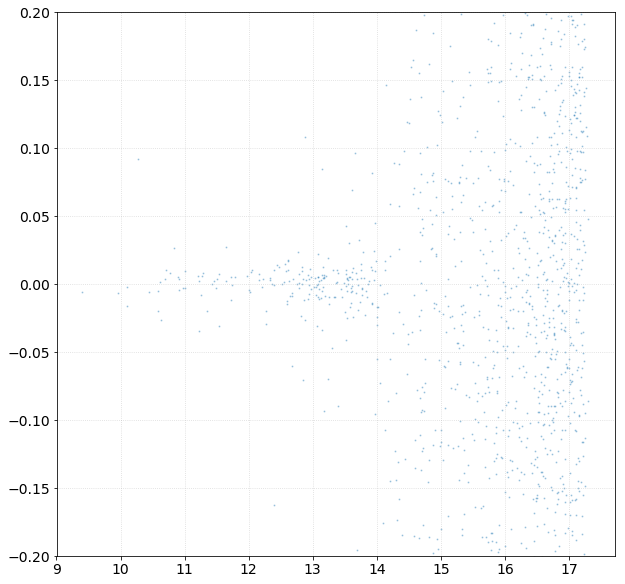

In [155]:
key = 'xstd'
delta_val = fd_tbl[key]/ standard_tbl[key][idx] -1.
delta_val[~dist_mask] = np.nan
fig = plt.figure(figsize=(10,10))
plt.scatter(fd_tbl['mbar'], delta_val, s=1, alpha=.3)
plt.ylim(-0.2,.2)
plt.grid(ls=':', alpha=.5)

In [143]:
np.nanmedian(delta_val)

0.0

In [26]:
tbl_i.colnames

['mbar',
 'rbar',
 'dbar',
 'qbar',
 'xbar',
 'ybar',
 'mstd',
 'rstd',
 'dstd',
 'qstd',
 'xstd',
 'ystd',
 'n',
 'n_expected']

In [27]:
from astropy.coordinates import SkyCoord
from astropy import units as u
def match_catalogs(cat1, cat2, max_dist=.04, ra_key=None, dec_key=None):
    
    if not ra_key:
        if 'rbar' in cat1.colnames:
            ra_key = 'rbar'
        elif 'RA' in [colname.upper() for colname in cat1.colnames]:
            ind = [colname.upper() for colname in cat1.colnames].index('RA')
            ra_key = cat1.colnames[ind]
            
    if not dec_key:
        if 'dbar' in cat1.colnames:
            ra_key = 'dbar'
        elif 'DEC' in [colname.upper() for colname in cat1.colnames]:
            ind = [colname.upper() for colname in cat1.colnames].index('DEC')
            dec_key = cat1.colnames[ind]
    
    ra1 = cat1[ra_key]
    dec1 = cat1[dec_key]
    ra2 = cat2[ra_key]
    dec2 = cat2[dec_key]
    
    coord1 = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree)
    coord2 = SkyCoord(ra=ra2*u.degree, dec=dec2*u.degree)
    
    idx, d2d, d3d = coord1.match_to_catalog_sky(coord2)
    print len(idx)

In [32]:
standard_tbl = Table.read('i_standard.txt', format='ascii.commented_header')

(array([   4.,   14.,   21.,   25.,   74.,  102.,  178.,  256.,  408.,  737.]),
 array([  9.40390773,  10.19546141,  10.98701509,  11.77856878,
         12.57012246,  13.36167614,  14.15322982,  14.9447835 ,
         15.73633718,  16.52789087,  17.31944455]),
 <a list of 10 Patch objects>)

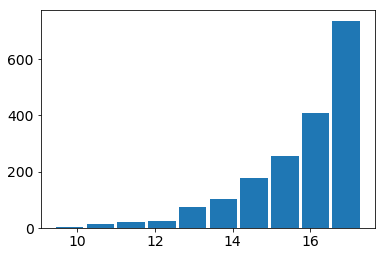

In [36]:
plt.hist(standard_tbl['mbar'], rwidth=.9)

In [43]:
standard_tbl

<Table length=1819>
     mbar          rbar          dbar      ...       ystd         n   n_expected
   float64       float64       float64     ...     float64      int64   int64   
------------- ------------- -------------- ... ---------------- ----- ----------
14.5785073845 80.4512337304 -67.9323520734 ... 0.00838953888365     3          4
 16.641879349 80.4523581821 -67.9330710086 ... 0.00481413572853     6          7
16.9470460156 80.4547715229 -67.9355118829 ...  0.0127663182263     6          7
15.5196028956 80.4583764084 -67.9391513376 ...  0.0170386538273     7          7
17.1488092409 80.4662779634  -67.947595089 ...  0.0112003708979     5          7
15.8314514198 80.4478981762 -67.9278802078 ...  0.0119929008698     5          6
 16.547031467 80.4634600388 -67.9445054225 ...  0.0124968742298     7          7
15.6816271234 80.4795953761 -67.9613363878 ...  0.0111017664558     6          7
16.4284600384 80.4511044835 -67.9307705122 ... 0.00797413670993     7          7
 14.865031467 80.4571425235 -67.9372624965 ... 0.00585910149296     7          7
          ...           ...            ... ...              ...   ...        ...
15.3111743241  80.572411719 -67.9267970283 ... 0.00730125542764     7          7
15.8129173144 80.5878179024 -67.9431100224 ...  0.0106136838465     7          7
17.1236271234 80.5842480675 -67.9391507081 ...  0.0138254618931     6          7
15.1108886098 80.5777900224 -67.9322181173 ... 0.00848080660934     7          7
15.0884366472 80.5983327393 -67.9537741861 ... 0.00814588454439     6          7
17.1143922845 80.5960196234 -67.9512019649 ...  0.0109350332113     5          7
15.1894366472 80.5855803397 -67.9399899237 ... 0.00528906991964     6          6
17.1454376428 80.5788348439 -67.9327062891 ... 0.00925035932221     5          6
15.8461730008 80.5982879702 -67.9533392067 ...  0.0102000691403     4          5
17.2135846467 80.5801592741 -67.9340049656 ...  0.0082699368902     3          6

In [42]:
match_catalogs(tbl_i, standard_tbl)

ValueError: Illegal type <type 'NoneType'> for table item access

### See the results!
The columns are mbar, rbar, dbar, qbar, xbar, and ybar which are mean magnitude (instrumental), RA, Dec, Q (fit quality), X position in the output frame, and Y position in the output frame.  The columns ending in 'std' are the standard deviations of the values.  The last column 'n' is the number of times that source was detected (and not clipped out from the averaging).

### To access a column from the table, the syntax is `tbl[<colname>]` as seen below

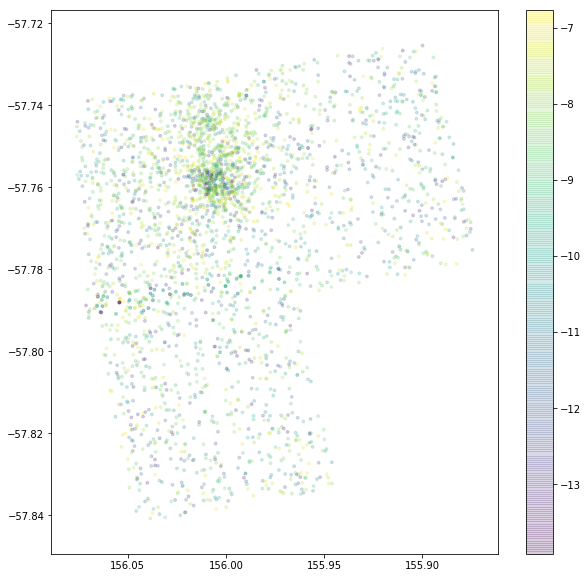

In [137]:
fig = plt.figure(figsize=(10,10))
plt.scatter(tbl['rbar'], tbl['dbar'], c=tbl['mbar'], s = 8, alpha=.2)
plt.xlim(plt.xlim()[::-1])
plt.colorbar()

(0, 0.1)

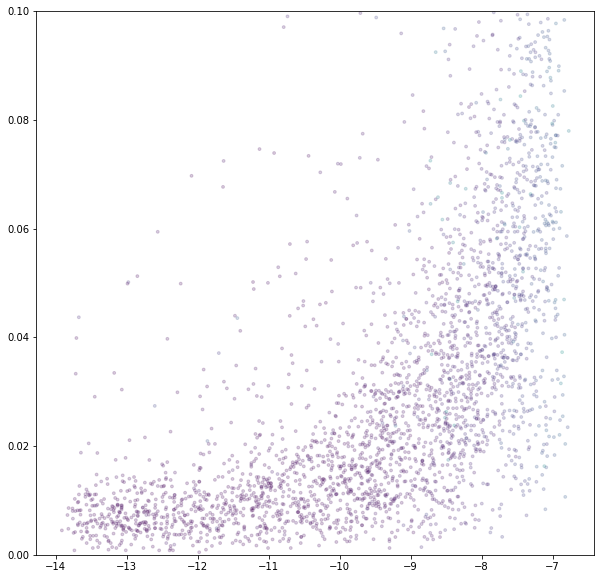

In [138]:
fig = plt.figure(figsize=(10,10))
plt.scatter(tbl['mbar'], tbl['mstd'], c=tbl['qbar'], s = 8, alpha=.2)
plt.ylim(0,.1)

(0, 0.1)

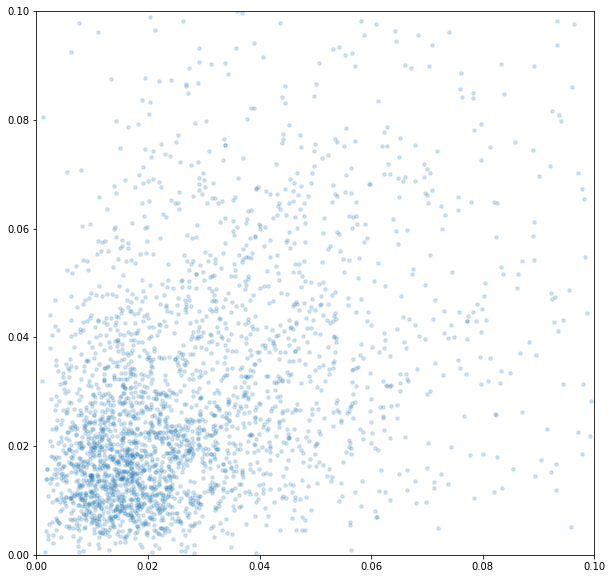

In [139]:
fig = plt.figure(figsize=(10,10))
plt.scatter(tbl['xstd'], tbl['ystd'], s = 12, alpha=.2)
plt.xlim(0,.1)
plt.ylim(0,.1)

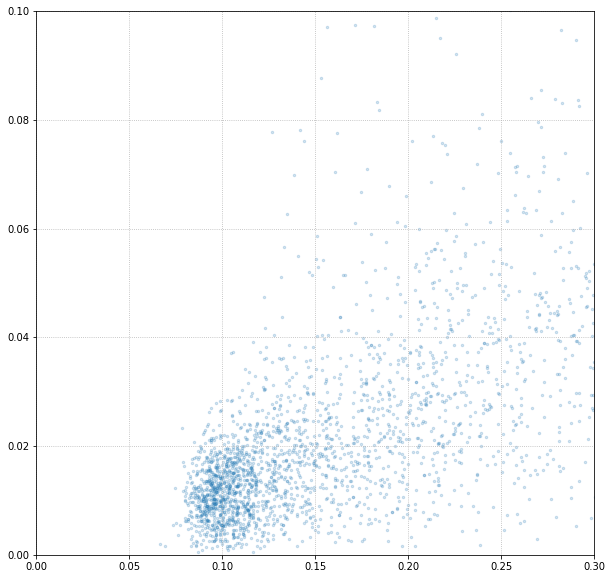

In [140]:
fig = plt.figure(figsize=(10,10))
plt.scatter(tbl['qbar'], tbl['qstd'], s = 6, alpha=.2)
plt.ylim(0,.1)
plt.xlim(0,.3)
plt.grid(ls=':')

(0, 0.1)

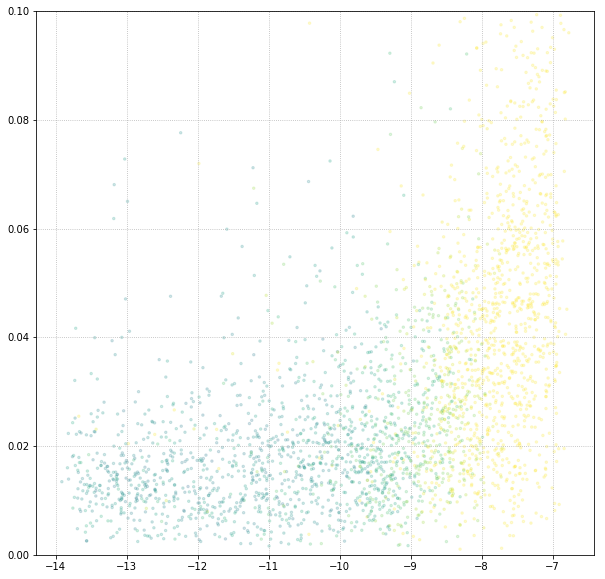

In [141]:
# stat, bedges, bn = binned_statistic(tbl['mbar'], tbl['xstd'],statistic=np.nanmedian, bins=20)
fig = plt.figure(figsize=(10,10))
plt.scatter(tbl['mbar'], tbl['xstd'], s = 6, alpha=.2, c=tbl['qbar'], vmin=0, vmax=.2)
# plt.scatter(bedges[1:], stat)
plt.grid(ls=':')
plt.ylim(0,.1)

In [7]:
tbl_i = Table.read('tbl_i.txt', format='ascii.commented_header')

In [8]:
from astropy.stats import sigma_clip

In [9]:
from photometry_tools import phot_wrapper

In [265]:
def ap_phot_image(tbl, image, r=5., a=8., d=2.):
    rd = np.array([tbl['rbar'], tbl['dbar']])
    data = fits.getdata(image)
    w = WCS(fits.getheader(image, 1))
    xy = w.all_world2pix(rd.T, 1)
    radius=r
    ann = a
    dann = d
    ap_phot = phot_wrapper.photometry(data, coords=xy, radius=radius, annulus=ann, dannulus=dann, origin=1.)
    return ap_phot

In [266]:
ap_phot_tbl_i = ap_phot_image(tbl_i, 'test_drc.fits', r=5., a=10., d=2.)
ap_phot_tbl_i

<Table length=9584>
      X             Y            flux     ...       mag          mag_error   
   float64       float64       float64    ...     float64         float64    
------------- ------------- ------------- ... --------------- ---------------
8.89572232368 190.746985473 6.55655758653 ...  -2.04168969997  0.424149015265
12.1213910741 457.861433648 1.93305767982 ... -0.715612032451  0.781538227339
14.0435894345 898.896816705           nan ...             nan             nan
16.9875909335 1090.70405646 51.8794097454 ...  -4.28748756571  0.150755175698
19.6881944192 227.932545708 3.30167270464 ...  -1.29683504844  0.597639074085
19.7401495031 471.590376706 17.3791378257 ...  -3.10007056854  0.260478199077
 20.346685373 1236.34667238 2.54325393082 ...  -1.01347431103  0.681278462808
21.0207119986 1489.58742808 9.55294672226 ...  -2.45034338912  0.351363741101
22.1813133088 1436.76181059 32.6810124733 ...  -3.78573875679  0.189934223346
23.3204956487 1800.43297177           nan ...             nan             nan
          ...           ...           ... ...             ...             ...
4137.01875065 3639.13353879 33.6105128431 ...  -3.81618784791  0.187280149471
4138.20788949 1803.23952539 7.61489843033 ...  -2.20416028742  0.393482639597
4138.12041695 3373.63869279 4.12841223247 ...  -1.53945764049   0.53454087019
4139.14448375 2014.91765318 3.60930121797 ...  -1.39355782017  0.571642995452
4139.87998353 2882.21535635 11.6481530497 ...  -2.66564267094  0.318139439882
4142.66377609 1952.66619456 292.446096862 ...  -6.16511457354 0.0634898541149
4143.84659582 1293.01410705 3.82297205323 ...   -1.4560028081  0.555472105932
4144.59716248 808.613049358 2.86134641785 ...  -1.14142610052  0.642013663334
4144.64677344 1475.07111285 3.98277555418 ...  -1.50046458204  0.544233557706
4146.78945806 506.042888342 14.6070129948 ...  -2.91140353907    0.2840924075

In [267]:
np.sum(np.isnan(ap_phot_tbl_i['mag']))

5

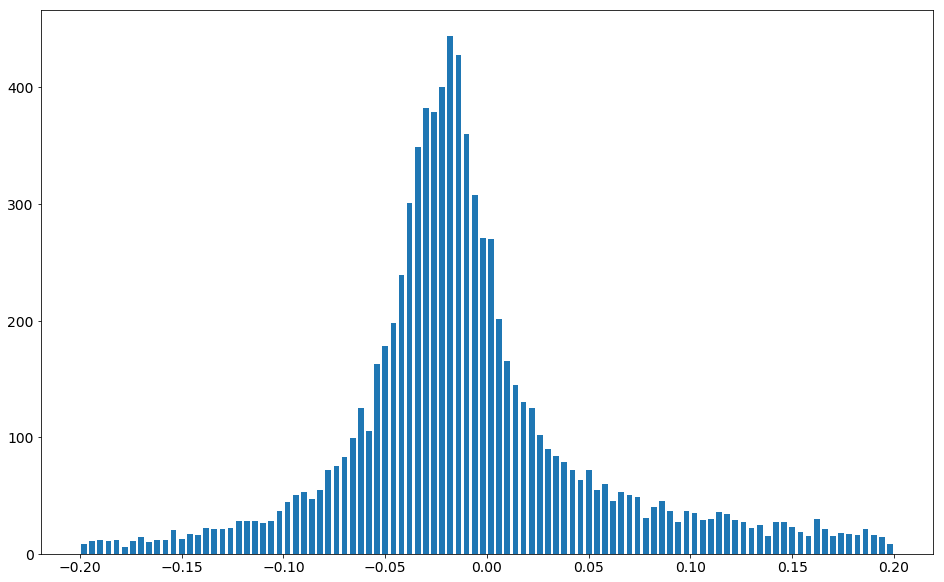

In [268]:
plt.figure(figsize=(16,10)) 
h, b, p = plt.hist(tbl_i['mbar']-ap_phot_tbl_i['mag']-21.1, range=(-.2,.2), bins=100, rwidth=.7)

In [269]:
from astropy.modeling import models, fitting 

In [270]:
midpts = .5 * (b[:-1] + b[1:])
derp = models.Gaussian1D(500., 0., .1)
fitter = fitting.LevMarLSQFitter()
fit_mod = fitter(derp, midpts, h)

In [271]:
fit_mod

<Gaussian1D(amplitude=378.87903007228493, mean=-0.01993468626855397, stddev=0.027768209141235834)>

In [276]:
print midpts[np.argmax(h)]
print np.nanmedian((tbl_i['mbar']-ap_phot_tbl_i['mag']-21.1)[mask])


-0.018
-0.0204384990037


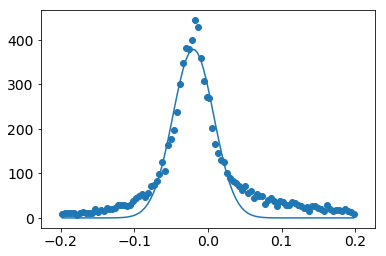

In [273]:
plt.scatter(midpts, h)
plt.plot(midpts, fit_mod(midpts))

In [274]:
fit_mod

<Gaussian1D(amplitude=378.87903007228493, mean=-0.01993468626855397, stddev=0.027768209141235834)>

In [285]:
mask = (tbl_i['mbar']<17.5) & (tbl_i['mbar']>14.)

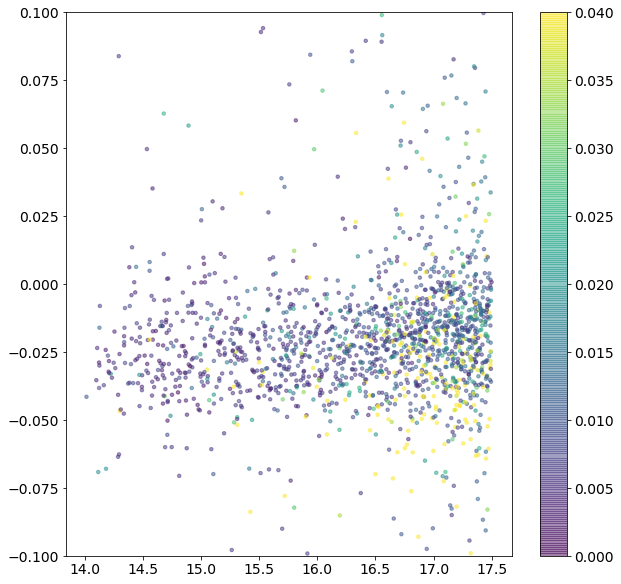

In [286]:
plt.figure(figsize=(10,10))
plt.scatter(tbl_i['mbar'][mask], tbl_i['mbar'][mask]-ap_phot_tbl_i['mag'][mask]-21.1, s=12, alpha=.5, c=tbl_i['mstd'][mask], vmax=.04)
plt.ylim(-.1, .1)
plt.colorbar()

(-0.1, 0.1)

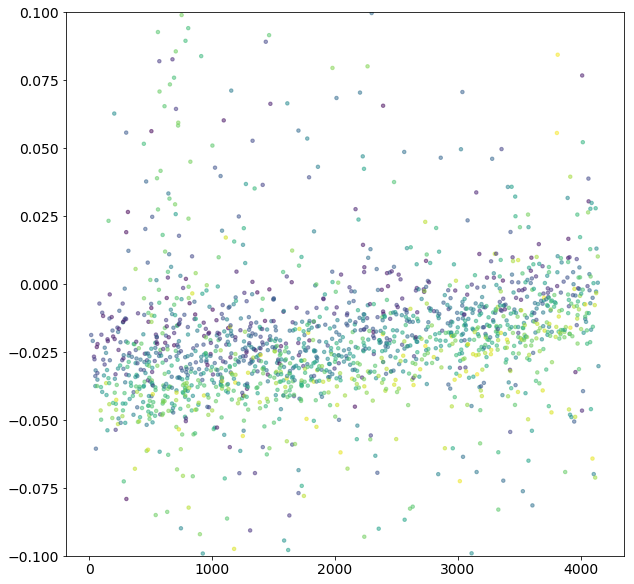

In [287]:
plt.figure(figsize=(10,10))
plt.scatter(tbl_i['xbar'][mask], tbl_i['mbar'][mask]-ap_phot_tbl_i['mag'][mask]-21.1, s=12, alpha=.5, c=tbl_i['ybar'][mask])
plt.ylim(-.1, .1)
# plt.xlim(13, 21)

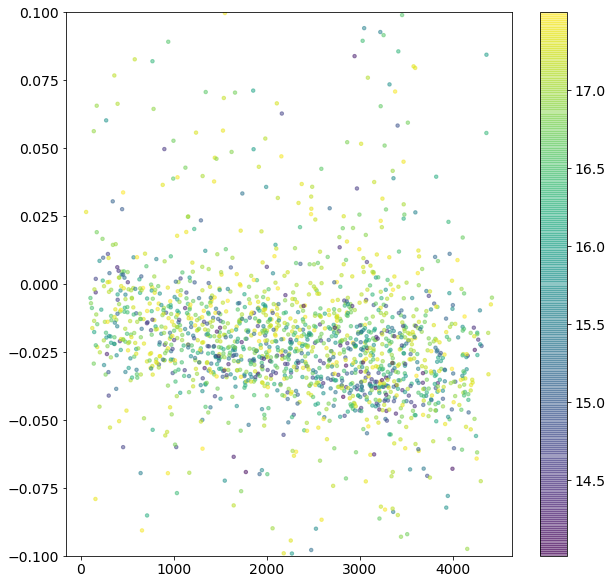

In [288]:
plt.figure(figsize=(10,10))
plt.scatter(tbl_i['ybar'][mask], tbl_i['mbar'][mask]-ap_phot_tbl_i['mag'][mask]-21.1, s=12, alpha=.5, c=tbl_i['mbar'][mask])
plt.ylim(-.1, .1)
# plt.xlim(13, 21)
plt.colorbar()

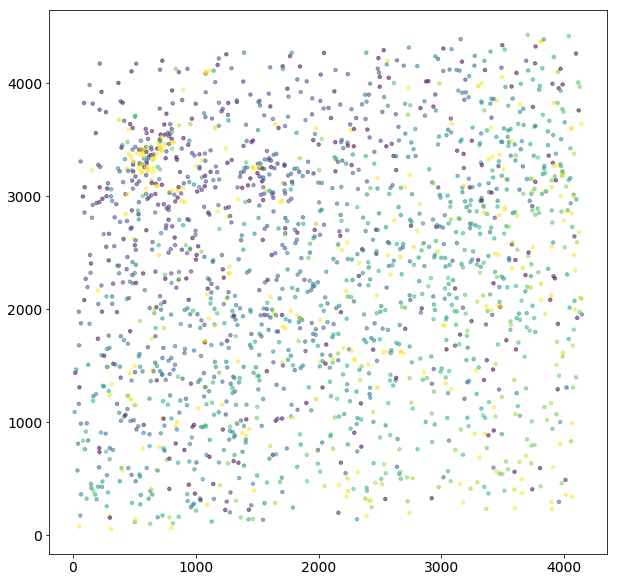

In [289]:
plt.figure(figsize=(10,10))
plt.scatter(tbl_i['xbar'][mask], tbl_i['ybar'][mask], c=tbl_i['mbar'][mask]-ap_phot_tbl_i['mag'][mask]-21.1, s=12, alpha=.5, vmin=-.05, vmax=.01 )
# plt.ylim(-.3, .3)
# plt.xlim(13, 21)

In [290]:
big_ap_phot = ap_phot_image(tbl_i, 'test_drc.fits', r=10., a=10., d=2.)

In [291]:
bright_mask = (tbl_i['mbar']<16.) & (tbl_i['mbar']>13.)

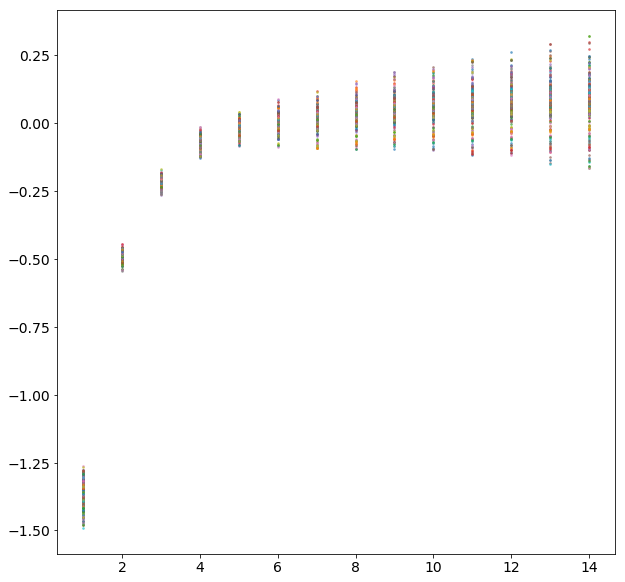

In [292]:
r_upper = 15
ap_mags = []
for i in range(1, r_upper):
    tmp_tbl = ap_phot_image(tbl_i[bright_mask], 'test_drc.fits', r=float(i), a=15., d=9.)
    ap_mags.append(np.array(tbl_i['mbar'][bright_mask] - 21.1 - tmp_tbl['mag']))
ap_mags = np.array(ap_mags)

fig = plt.figure(figsize=(10,10))
for row in sigma_clip(ap_mags, axis=1).T:
    plt.scatter(np.arange(1,r_upper), row, s=3, alpha=.5)

<ErrorbarContainer object of 3 artists>

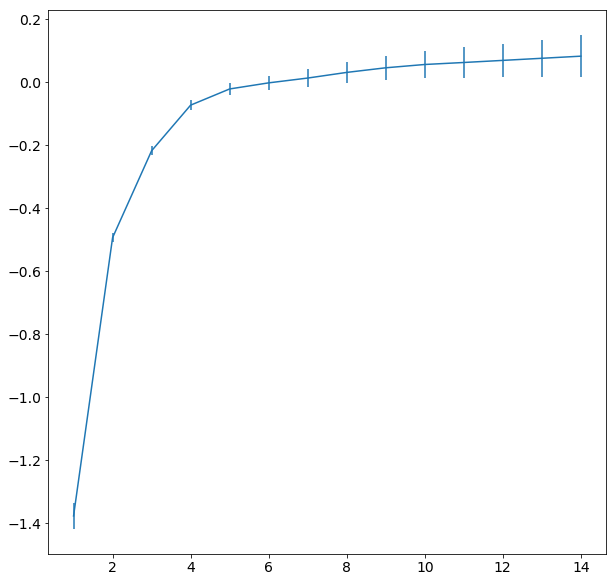

In [293]:
fig = plt.figure(figsize=(10,10))
plt.errorbar(np.arange(1,r_upper), np.nanmedian(sigma_clip(ap_mags, axis=1), axis=1), yerr=np.nanstd(sigma_clip(ap_mags, axis=1), axis=1))

(0.0, 0.3)

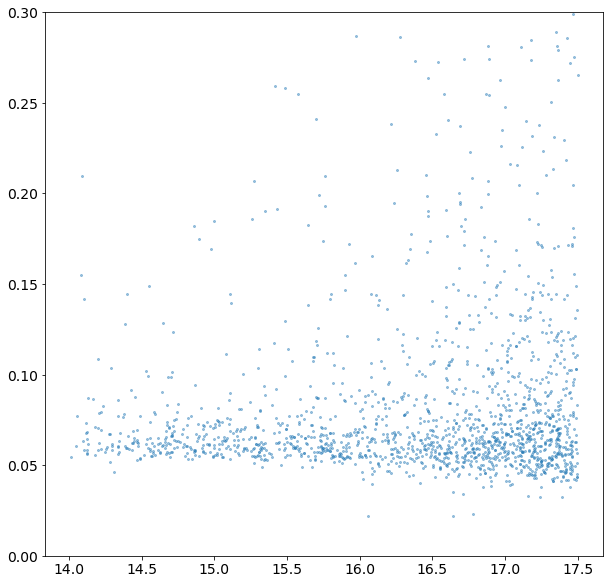

In [295]:
fig = plt.figure(figsize=(10,10))
# plt.scatter(tbl_i['mbar'], tbl_i['mbar'] - 21.1 - big_ap_phot['mag'], s=4, alpha=.4)
plt.scatter(tbl_i['mbar'][mask], ap_phot_tbl_i['mag'][mask] - big_ap_phot['mag'][mask], s=4, alpha=.4)
plt.ylim(0., .3)
# plt.xlim(13, 21)

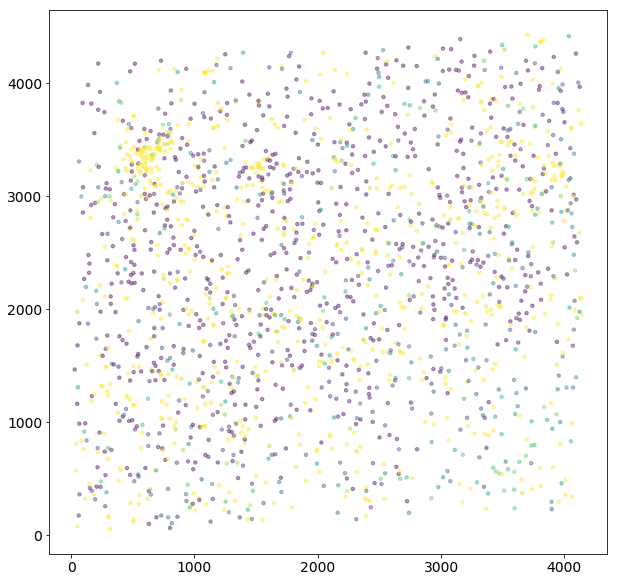

In [296]:
fig = plt.figure(figsize=(10,10))
# plt.scatter(tbl_i['mbar'], tbl_i['mbar'] - 21.1 - big_ap_phot['mag'], s=4, alpha=.4)
plt.scatter(tbl_i['xbar'][mask], tbl_i['ybar'][mask], c = ap_phot_tbl_i['mag'][mask] - big_ap_phot['mag'][mask], s=12, alpha=.4, vmin=.06, vmax=.08)
# plt.ylim(0., .3)

(0.0, 0.3)

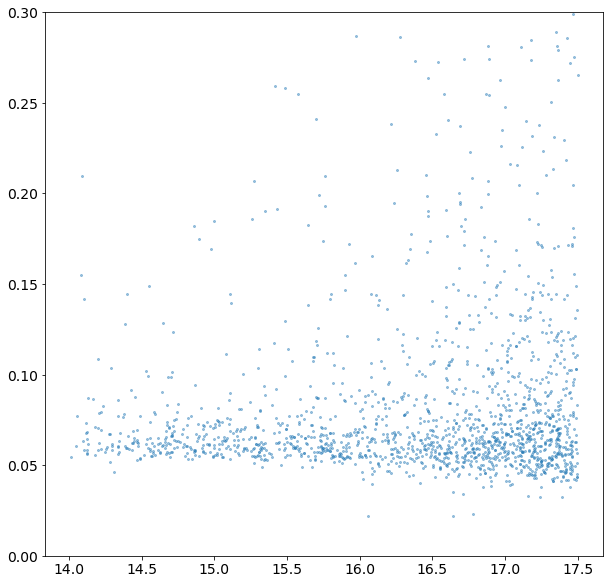

In [297]:
fig = plt.figure(figsize=(10,10))
# plt.scatter(tbl_i['mbar'], tbl_i['mbar'] - 21.1 - big_ap_phot['mag'], s=4, alpha=.4)
plt.scatter(tbl_i['mbar'][mask], ap_phot_tbl_i['mag'][mask] - big_ap_phot['mag'][mask], s=4, alpha=.4)
plt.ylim(0., .3)

In [298]:
np.nanmedian(tbl_i['mbar'][mask] - ap_phot_tbl_i['mag'][mask])-21.1

-0.02199833985369537

In [299]:
np.nanmedian(ap_phot_tbl_i['mag'][mask] - big_ap_phot['mag'][mask])

0.067266486760175326

In [300]:
np.nanmedian(tbl_i['mbar'][mask] - big_ap_phot['mag'][mask])-21.1


0.045330108341893549

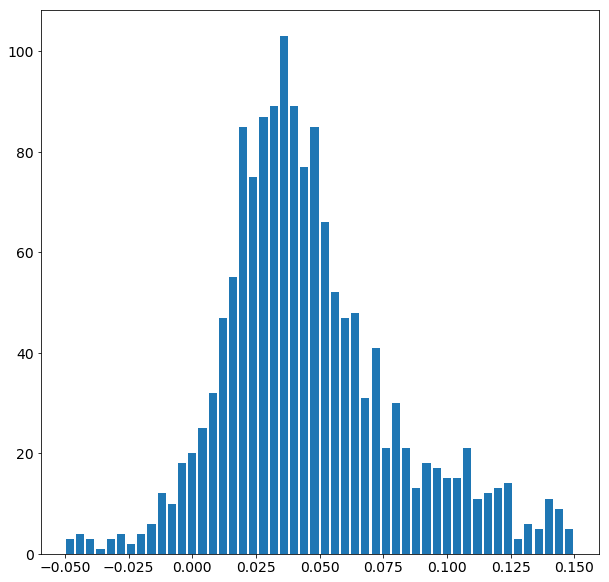

In [327]:
plt.figure(figsize=(10,10)) 
h, b, p = plt.hist(tbl_i['mbar'][mask]-21.1 - big_ap_phot['mag'][mask], range=(-.05,.15), bins=50, rwidth=.8)

In [337]:
derp.amplitude_0.bounds = (0., 150.)

In [409]:
midpts = .5 * (b[:-1] + b[1:])
derp = models.Gaussian1D(110., 0.03, .1) + models.Gaussian1D(20, .08, .3)
derp.amplitude_0.bounds = (60., 150.)
derp.mean_0.bounds = (0.01, .05)
derp.stddev_0.bounds =(.01, .02)

derp.amplitude_1.bounds = (10., 30.)
derp.mean_1.bounds = (.03, .07)
derp.stddev_1.bounds =(.03, .15)

fitter = fitting.LevMarLSQFitter()
fit_mod = fitter(derp, midpts, h)

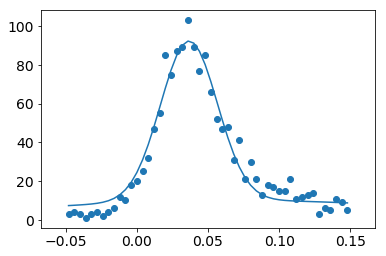

In [410]:
plt.scatter(midpts, h)
plt.plot(midpts, fit_mod(midpts))

In [411]:
fit_mod

<CompoundModel36(amplitude_0=82.56726553825735, mean_0=0.03663383544962917, stddev_0=0.02, amplitude_1=10.0, mean_1=0.07, stddev_1=0.15)>

In [398]:
fit_mod.param_names

(u'amplitude_0',
 u'mean_0',
 u'stddev_0',
 u'amplitude_1',
 u'mean_1',
 u'stddev_1')

In [357]:
fit_mod.param_names

(u'amplitude_0',
 u'mean_0',
 u'stddev_0',
 u'amplitude_1',
 u'mean_1',
 u'stddev_1')

(-5, 30)

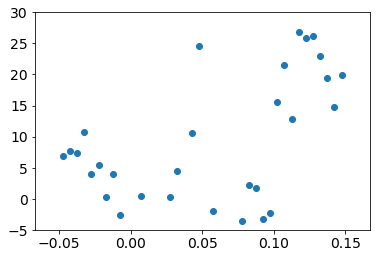

In [249]:
plt.scatter(midpts, h-fit_mod(midpts))
plt.ylim(-5,30)

(0, 0.3)

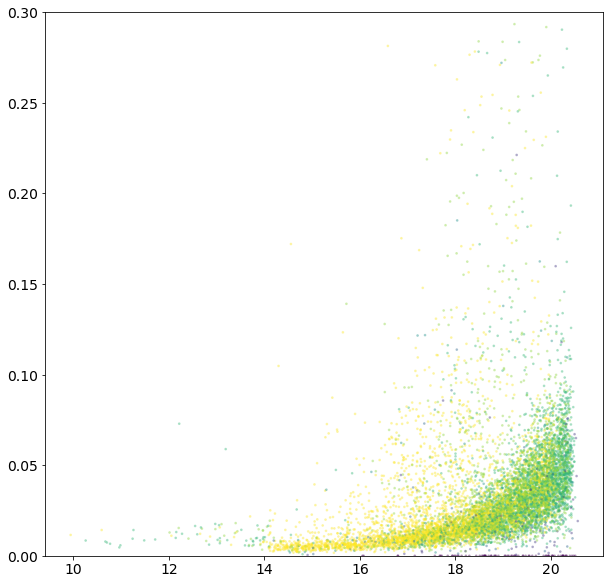

In [281]:
plt.figure(figsize=(10,10)) 
plt.scatter(tbl_i['mbar'], tbl_i['mstd'], c=tbl_i['n'], s=3, alpha=.3)
plt.ylim(0,.3)

In [250]:
fit_mod

<Gaussian1D(amplitude=132.79961998443645, mean=0.049473181694858405, stddev=0.02670851564194713)>

In [262]:
dmag = tbl_i['mbar']- big_ap_phot['mag']-21.1

In [263]:
np.nanmedian(sigma_clip(dmag[mask], sigma=3.))

0.061672495298479291

(array([   4.,    0.,    2.,    1.,    2.,    1.,    0.,    1.,    3.,
           3.,    5.,    3.,    2.,    4.,    3.,    3.,    3.,    4.,
           5.,    5.,    2.,    4.,    2.,    5.,    3.,    3.,    2.,
           5.,    5.,    4.,    7.,    8.,    8.,   12.,    6.,    9.,
           6.,   13.,   11.,   12.,   21.,   39.,   32.,   59.,   65.,
          95.,  113.,  151.,  139.,  157.,  113.,  125.,  100.,   96.,
          82.,   73.,   64.,   50.,   33.,   24.,   34.,   34.,   21.,
          32.,   29.,   28.,   24.,   20.,   15.,   20.,   15.,   14.,
          17.,   12.,    5.,   13.,    9.,   10.,   12.,   10.,   11.,
           5.,   11.,    3.,    8.,    9.,    7.,    5.,    7.,    4.,
           7.,    7.,   12.,    4.,   10.,    5.,    2.,    5.,    7.,    2.]),
 array([-0.2  , -0.195, -0.19 , -0.185, -0.18 , -0.175, -0.17 , -0.165,
        -0.16 , -0.155, -0.15 , -0.145, -0.14 , -0.135, -0.13 , -0.125,
        -0.12 , -0.115, -0.11 , -0.105, -0.1  , -0.095, -0.09 , -0

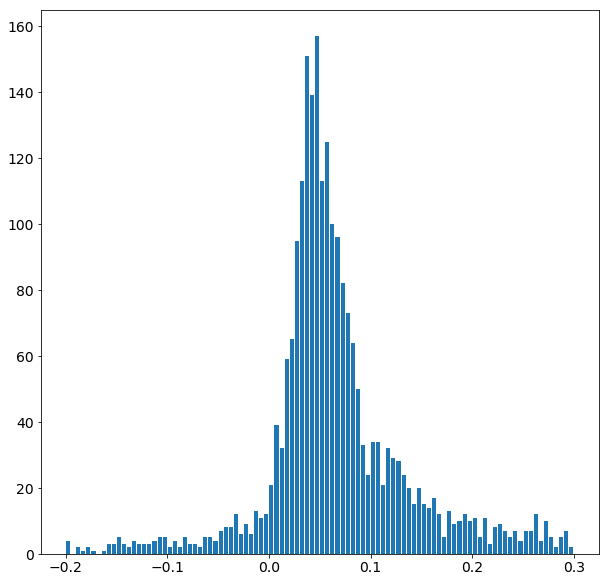

In [253]:
plt.figure(figsize=(10,10)) 
plt.hist(dmag[mask], range=(-.2,.3), bins=100, rwidth=.8)

In [71]:
np.nanstd(dmag[mask])

0.39238335167678268

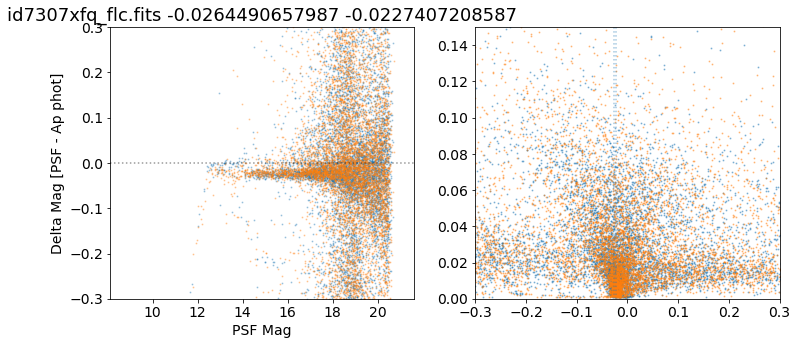

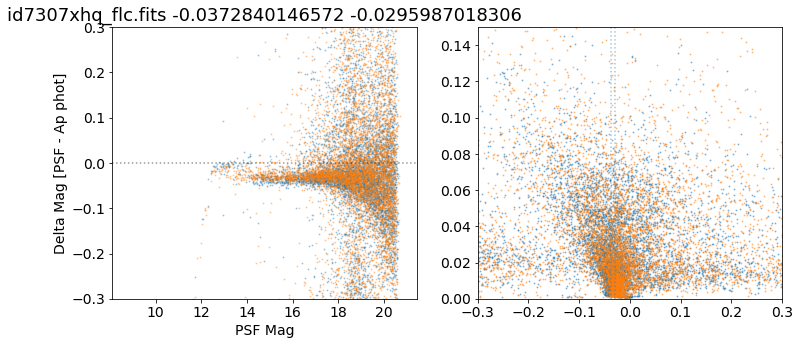

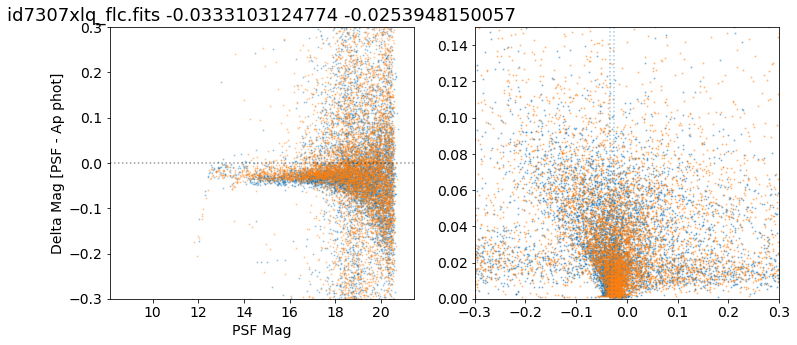

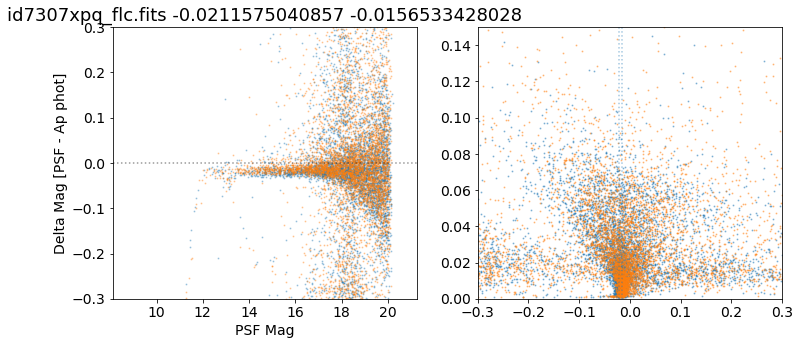

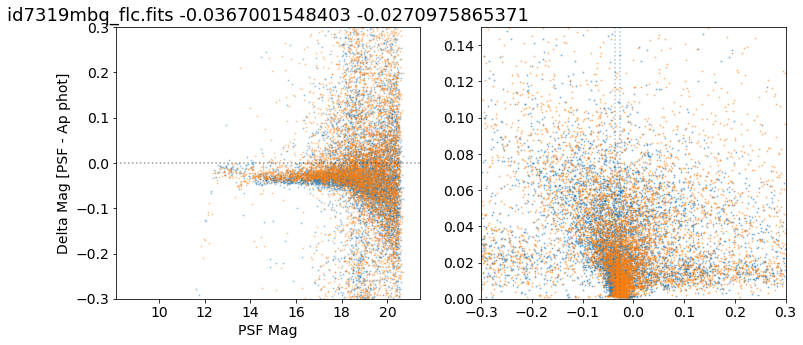

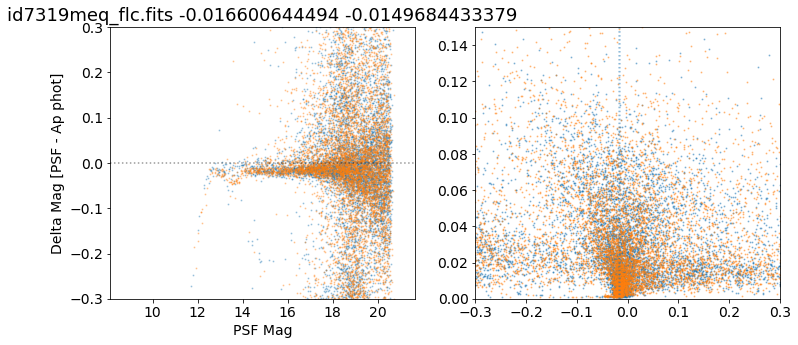

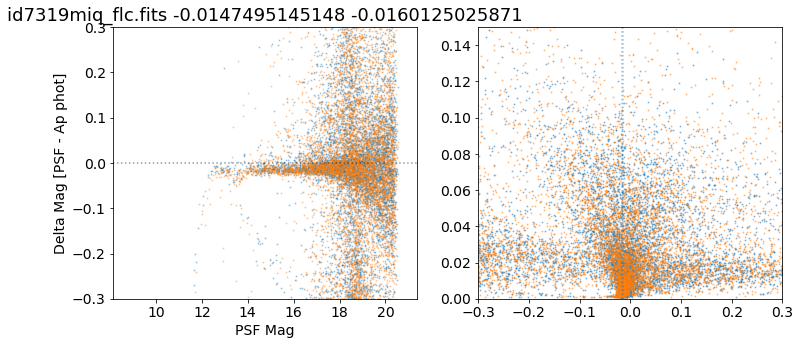

In [33]:
for im in input_images:
    term = im.replace('.fits', '')+'*.cat'
    cats = sorted(glob.glob(term))
    fig = plt.figure(figsize=(12,5))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    exptime = fits.getval(im, 'EXPTIME')

    flt_meds = []
    for i, ext in enumerate([1,2]):
        data = fits.getdata(im, 'sci', ext)
        radius=5.
        ann = 10.
        dann = 2.
        psf_tbl = Table.read(cats[i], format='ascii.commented_header')
        coords = np.array([psf_tbl['x'], psf_tbl['y']])
        psf_mag = psf_tbl['m'] + 2.5 * np.log10(exptime) + 21.1
        ap_phot = phot_wrapper.photometry(data, coords=coords, radius=radius, annulus=ann, dannulus=dann, origin=1., salgorithm='median')
        ap_mag = ap_phot['mag'] + 2.5 * np.log10(exptime) + 21.1
        ax1.scatter(psf_mag, psf_mag - ap_mag, s=1, alpha=.3)
        clipped_deltas = sigma_clip(psf_mag - ap_mag, sigma=3., iters=10)
        med = np.nanmedian(clipped_deltas[~clipped_deltas.mask])
        plt.axhline(med, alpha=.4)
        flt_meds.append(med)
        ax2.scatter(psf_mag - ap_mag, ap_phot['mag_error'], alpha=.4, s=1)
#         h, b, p = ax2.hist(psf_tbl['m'] - ap_phot['mag'], range=(-.3,.3), bins=60, alpha=.4, rwidth=.7)
#         ax2.hist(psf_tbl['m'] - ap_phot['mag'], range=(-.3,.3), bins=60, alpha=.4, rwidth=.7)
        ax2.axvline(med, ls=':', alpha=.4)
        
    ax1.set_ylim(-.3,.3)
    ax2.set_xlim(-.3,.3)
    ax2.set_ylim(0,.15)
    ax1.axhline(0, ls=':', color='k', alpha=.4)
    med_str = '{} {}'.format(flt_meds[0], flt_meds[1])
    ax1.set_title('{} {}'.format(im, med_str))
    ax1.set_xlabel('PSF Mag')
    ax1.set_ylabel('Delta Mag [PSF - Ap phot]')

    
    

In [94]:
ap_phot

<Table length=9176>
   X        Y          flux       flux_error       mag          mag_error    
float64  float64     float64       float64       float64         float64     
-------- -------- ------------- ------------- -------------- ----------------
1306.947    6.752 8840.54569629 244.357179537 -9.86619768334  0.0300093002103
 1338.25    7.148 6892.54668446 254.041563777 -9.59594929086  0.0400161128273
1734.981    6.791 11822.3191047 263.728652936 -10.1817566938  0.0242194611697
3017.438    7.309 23680.7914993 207.068330677  -10.935990535 0.00949352079821
3213.736    8.163 3092.06671152 175.561358803 -8.72562213819  0.0616438728641
3254.677    7.283 14189.2878516 191.200745374 -10.3799014978  0.0146298145068
3389.879    8.122 2986.60289764 154.789362788  -8.6879437053  0.0562695533816
4041.133    8.042 23086.7004289 204.415278044  -10.908404669 0.00961305267748
 441.727    8.252 2597.99305766 253.785255805 -8.53659496555   0.106056731528
 748.723    8.815 5318.37141339 273.971841164 -9.31444665853  0.0559290062374
     ...      ...           ...           ...            ...              ...
3746.605 2038.261 13255.2062349 133.201998209  -10.305966223  0.0109102345819
2413.083 2039.518 8640.39855233 114.319167176 -9.84133443869  0.0143646521687
 793.242 2040.718 11864.8641675 169.676334721 -10.1856569266  0.0155263131551
 1508.94 2040.679 3109.36284226 108.002716215  -8.7316785108  0.0377114395916
 154.579 2041.893 4834.89413605 149.759632295 -9.21096742323  0.0336292849868
3456.722 2041.944 195860.231223 455.106592446 -13.2298656572 0.00252276444449
 221.763 2043.256 2548.72239175 107.879298564 -8.51580633612  0.0459542219388
1265.438 2043.194 17193.5279406 162.252843868 -10.5884124968   0.010245594342
1371.519 2043.197 14174.0832935 151.245398318 -10.3787374514  0.0115850263861
2196.722 2042.913 8829.31076533 117.430972253 -9.86481700739  0.0144399500668

In [79]:
flt_meds

[0.37743420203595157, 0.42498225040568016]

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   2.16000000e+02,
          6.33000000e+02,   6.10000000e+02,   5.86000000e+02,
          2.28200000e+03,   1.65000000e+03,   7.44000000e+02,
          4.59000000e+02,   3.14000000e+02,   1.93000000e+02,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 20 Patch objects>)

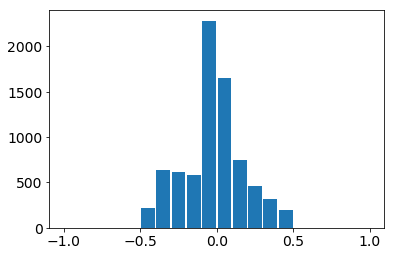

In [91]:
plt.hist(clipped_deltas[~clipped_deltas.mask], range=(-1,1), bins=20, rwidth=.9)

In [100]:
np.nanmedian(clipped_deltas[~clipped_deltas.mask])

0.013330698353279935

In [101]:
clipped_deltas.view()

masked_Column(data = [-0.04562842867743555 0.17128410940537897 0.12739557454737316 ...,
 -0.023318046448912 0.0471425883390193 -0.44866244541287337],
              mask = [False False False ..., False False False],
        fill_value = 1e+20)

In [108]:
derp = psf_tbl['m'] - ap_phot['mag']

In [109]:
np.nanmedian(derp[psf_tbl['m'] < -10.5])

0.00079038964759803321

In [15]:
import urllib2


In [ ]:
urllib2.u